In [ ]:
import pandas as pd
from pathlib import Path
import re

src = Path("C:\\Users\\15145\\Desktop\\RBC Menthorship\\Datas\\Toronto employment survey summary tables 2024.xlsx")
out_dir = Path("C:\\Users\\15145\\Desktop\\RBC Menthorship\\Datas")
out_dir.mkdir(exist_ok=True, parents=True)

xls = pd.ExcelFile(src)


In [ ]:
xls.sheet_names

['Read Me',
 'Table 1',
 'Table 2',
 'Table 3',
 'Table 4',
 'Table 5',
 'Table 6',
 'Table 7']

In [ ]:
raw = pd.read_excel(xls, sheet_name='Table 5', header=None)

In [ ]:
df_raw =raw

In [ ]:
df_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Table 5: Total Employment in the Centres and D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: Toronto Employment Survey, 2024; Toron...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-2024,NaN,NaN,2023-2024,NaN
3,NaN,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,NaN,Net Change,% Change,NaN,Net Change,% Change
4,Downtown,584660.0,537310.0,547700.0,564990.0,601010.0,643350.0,NaN,58690,0.100383,NaN,42340,0.070448
5,North York Centre,35920.0,34920.0,34830.0,33770.0,34770.0,35600.0,NaN,-320,-0.008909,NaN,830,0.023871
6,Yonge-Eglinton,18720.0,17510.0,17100.0,16010.0,15480.0,16610.0,NaN,-2110,-0.112714,NaN,1130,0.072997
7,Scarborough Centre,16830.0,15250.0,14280.0,14120.0,13720.0,13670.0,NaN,-3160,-0.18776,NaN,-50,-0.003644
8,Etobicoke Centre,10850.0,9960.0,10110.0,9960.0,9780.0,10420.0,NaN,-430,-0.039631,NaN,640,0.06544
9,Downtown and the Centres,666980.0,614950.0,624020.0,638850.0,674760.0,719650.0,NaN,52670,0.078968,NaN,44890,0.066527


In [ ]:

# Pick header as the first row with the maximum number of non-nulls

header_row_idx=3
# Build header and body
header = (df_raw.iloc[header_row_idx].astype(str))



In [ ]:
header.values[0] = "Centre" 

In [ ]:

df = df_raw.iloc[header_row_idx + 1 :-2].copy()
df.columns = header.values

In [ ]:
df.rename(columns={str(i)+ ".0":str(i) for i in range(2019,2025)}, inplace=True)

In [ ]:
ccolumns = [str(i) for i in range(2019,2025)]
ccolumns.append("Centre")
df = df[ccolumns]

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df2 = df.set_index("Centre")

In [ ]:
list(df2.loc["Downtown"])

[584660.0, 537310.0, 547700.0, 564990.0, 601010.0, 643350.0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ccolumns = []

In [ ]:
y=df2.loc["Downtown"]

In [ ]:
y.index

Index(['2019', '2020', '2021', '2022', '2023', '2024'], dtype='object')

In [ ]:
ccolumns

[]

In [ ]:
def normalize(numbers_list):
    min_ = min(numbers_list)
    max_ = max(numbers_list)
    range_ = max_ - min_
    normalized_list=(numbers_list - min_)/range_
    return normalized_list

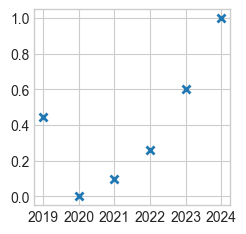

In [ ]:
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()

y = df2.loc["Downtown"]
normalized_y = normalize(y)

x = y.index
ax.plot(x, normalized_y, 'x', markeredgewidth=2)


plt.show()

In [ ]:
df2

,2019,2020,2021,2022,2023,2024
Centre,,,,,,
Downtown,584660.0,537310.0,547700.0,564990.0,601010.0,643350.0
North York Centre,35920.0,34920.0,34830.0,33770.0,34770.0,35600.0
Yonge-Eglinton,18720.0,17510.0,17100.0,16010.0,15480.0,16610.0
Scarborough Centre,16830.0,15250.0,14280.0,14120.0,13720.0,13670.0
Etobicoke Centre,10850.0,9960.0,10110.0,9960.0,9780.0,10420.0
Downtown and the Centres,666980.0,614950.0,624020.0,638850.0,674760.0,719650.0
Rest of the City,902820.0,834960.0,827500.0,845750.0,860530.0,880650.0
City Total,1569800.0,1449910.0,1451520.0,1484600.0,1535290.0,1600300.0


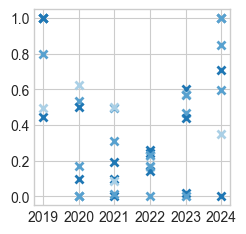

In [ ]:
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()

for i in df2.index:
    y = df2.loc[i]
    normalized_y = normalize(y)
    x = y.index
    ax.plot(x, normalized_y, 'x', markeredgewidth=2)


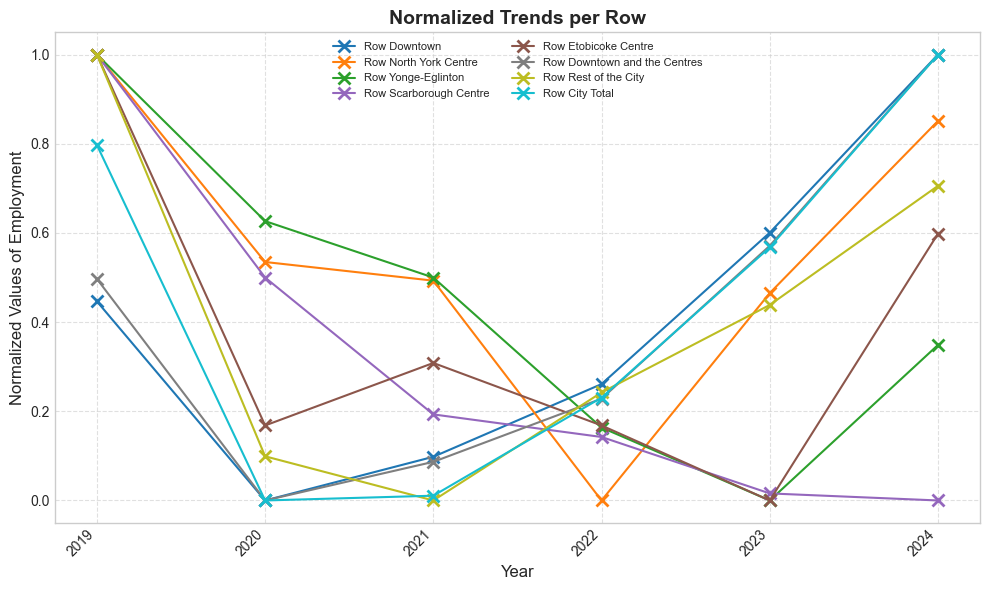

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(df2)))  # choose 10 distinct colors

for color, i in zip(colors, df2.index):
    y = df2.loc[i]
    normalized_y = normalize(y)
    x = y.index
    ax.plot(x, normalized_y, 'x-', color=color, markersize=8, markeredgewidth=2, label=f'Row {i}')

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Normalized Values of Employment", fontsize=12)
ax.set_title("Normalized Trends per Row", fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=8, loc='best', ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
#Table 7: Total Employment in Secondary Plan Areas by Six Categories, 2024						
raw = pd.read_excel(xls, sheet_name='Table 7', header=None)
df_raw =raw

In [ ]:
df_raw

,0,1,2,3,4,5,6,7,8
0,Table 7: Total Employment in Secondary Plan Ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: Toronto Employment Survey, 2024; Toron...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Number,Secondary Plan Area,Manufacturing & Warehousing,Retail,Service,Office,Institutional,Community & Entertainment,Total
3,1,Agincourt,650,620,510,2160,190,20,4140
4,2,Highland Creek,10,80,410,280,4180,430,5380
5,3,Morningside Heights,10,40,0,0,180,0,230
6,4,Port Union Village Community,0,0,10,0,0,0,10
7,5,Scarborough Centre,590,3030,1460,8020,370,200,13670
8,6,Yonge St. Clair,40,590,1030,12660,960,130,15410
9,7,Downsview Area,4120,910,2050,950,1520,380,9940


In [ ]:
df = df_raw.drop([0, 1])

In [ ]:
df

,0,1,2,3,4,5,6,7,8
2,Number,Secondary Plan Area,Manufacturing & Warehousing,Retail,Service,Office,Institutional,Community & Entertainment,Total
3,1,Agincourt,650,620,510,2160,190,20,4140
4,2,Highland Creek,10,80,410,280,4180,430,5380
5,3,Morningside Heights,10,40,0,0,180,0,230
6,4,Port Union Village Community,0,0,10,0,0,0,10
7,5,Scarborough Centre,590,3030,1460,8020,370,200,13670
8,6,Yonge St. Clair,40,590,1030,12660,960,130,15410
9,7,Downsview Area,4120,910,2050,950,1520,380,9940
10,8,North York Centre,70,1670,3130,27640,2320,770,35600
11,9,Sheppard East Subway Corridor,20,3790,1520,4380,5010,230,14960


In [ ]:
# Set row at index 2 as header, drop the Number column
df.columns = df.iloc[0]           # Use first row as column names
df = df.iloc[1:, 1:]              # Drop that row and the Number column
df = df.reset_index(drop=True)    # Reset index to 0, 1, 2...

In [ ]:
df

2,Secondary Plan Area,Manufacturing & Warehousing,Retail,Service,Office,Institutional,Community & Entertainment,Total
0,Agincourt,650,620,510,2160,190,20,4140
1,Highland Creek,10,80,410,280,4180,430,5380
2,Morningside Heights,10,40,0,0,180,0,230
3,Port Union Village Community,0,0,10,0,0,0,10
4,Scarborough Centre,590,3030,1460,8020,370,200,13670
5,Yonge St. Clair,40,590,1030,12660,960,130,15410
6,Downsview Area,4120,910,2050,950,1520,380,9940
7,North York Centre,70,1670,3130,27640,2320,770,35600
8,Sheppard East Subway Corridor,20,3790,1520,4380,5010,230,14960
9,York University,0,80,570,810,7600,70,9140


In [ ]:
# Remove the "2" label (leftover from the original row)
df.columns.name = None

# Start row numbering from 1 instead of 0
df.index = range(1, len(df) + 1)

In [ ]:
df

,Secondary Plan Area,Manufacturing & Warehousing,Retail,Service,Office,Institutional,Community & Entertainment,Total
1,Agincourt,650,620,510,2160,190,20,4140
2,Highland Creek,10,80,410,280,4180,430,5380
3,Morningside Heights,10,40,0,0,180,0,230
4,Port Union Village Community,0,0,10,0,0,0,10
5,Scarborough Centre,590,3030,1460,8020,370,200,13670
6,Yonge St. Clair,40,590,1030,12660,960,130,15410
7,Downsview Area,4120,910,2050,950,1520,380,9940
8,North York Centre,70,1670,3130,27640,2320,770,35600
9,Sheppard East Subway Corridor,20,3790,1520,4380,5010,230,14960
10,York University,0,80,570,810,7600,70,9140


In [ ]:
df = df.drop([51, 52, 53, 54])


In [ ]:
df

,Secondary Plan Area,Manufacturing & Warehousing,Retail,Service,Office,Institutional,Community & Entertainment,Total
1,Agincourt,650,620,510,2160,190,20,4140
2,Highland Creek,10,80,410,280,4180,430,5380
3,Morningside Heights,10,40,0,0,180,0,230
4,Port Union Village Community,0,0,10,0,0,0,10
5,Scarborough Centre,590,3030,1460,8020,370,200,13670
6,Yonge St. Clair,40,590,1030,12660,960,130,15410
7,Downsview Area,4120,910,2050,950,1520,380,9940
8,North York Centre,70,1670,3130,27640,2320,770,35600
9,Sheppard East Subway Corridor,20,3790,1520,4380,5010,230,14960
10,York University,0,80,570,810,7600,70,9140


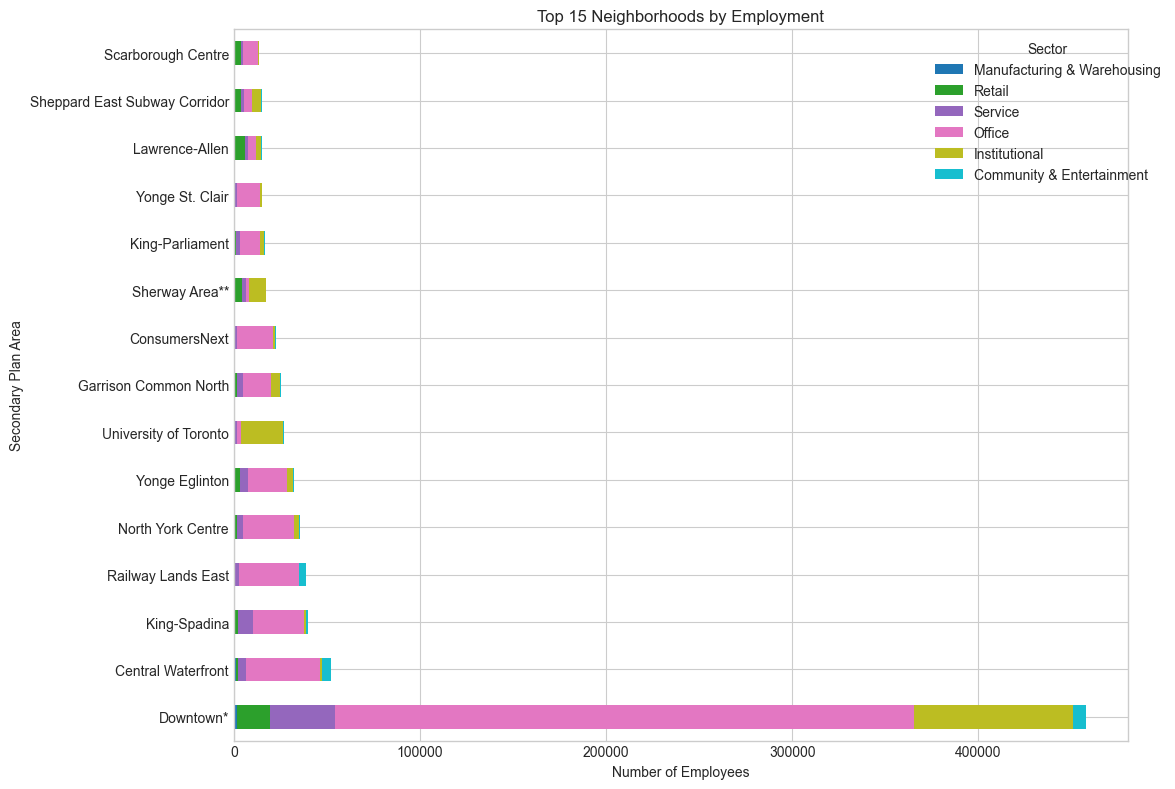

In [ ]:
# Convert all columns except 'Secondary Plan Area' to numeric
numeric_cols = df.columns.drop('Secondary Plan Area')
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Now get top 15
top_15 = df.nlargest(15, 'Total')
plot_data = top_15.drop('Total', axis=1).set_index('Secondary Plan Area')

plot_data.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab10')
plt.xlabel('Number of Employees')
plt.title('Top 15 Neighborhoods by Employment')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [16]:
!pip install msoffcrypto-tool




   ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
   ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.5 MB 11.2 MB/s eta 0:00:01
   ----------- ---------------------------- 1.0/3.5 MB 13.3 MB/s eta 0:00:01
   -------------------- ------------------- 1.8/3.5 MB 14.6 MB/s eta 0:00:01
   ------------------------------ --------- 2.7/3.5 MB 14.1 MB/s eta 0:00:01
   -------------------------------------- - 3.4/3.5 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 14.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
   ---------------------------------------- 114.6/114.6 kB 6.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\15145\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import io, re
import pandas as pd
import numpy as np
from datetime import date
from pathlib import Path
import msoffcrypto


PASSWORD = "WgN7$eF!9rZq42pT"
src = Path("C:\\Users\\15145\\Desktop\\RBC Menthorship\\ANONYMIZED_WoodGreen_Client_Extract_All_Systems_27_October_2025.xlsx")
TODAY_YEAR = date.today().year

In [18]:
def decrypt_excel(path: str, password: str) -> io.BytesIO:
    with open(path, "rb") as f:
        office = msoffcrypto.OfficeFile(f)
        office.load_key(password=password)
        bio = io.BytesIO()
        office.decrypt(bio)
    bio.seek(0)
    return bio

# Read only columns that actually exist
def read_available_columns(excel_bytes: io.BytesIO, wanted_cols: list) -> pd.DataFrame:
    hdr = pd.read_excel(excel_bytes, nrows=0, engine="openpyxl")
    excel_bytes.seek(0)
    available = [c for c in wanted_cols if c in hdr.columns]
    if not available:
        raise ValueError("None of the requested columns were found in the workbook.")
    df = pd.read_excel(excel_bytes, usecols=available, engine="openpyxl")
    return df

def standardize(df: pd.DataFrame) -> pd.DataFrame:
    RENAME_MAP = {
        "Birth Province / Country Code": "country_code",
        "Year of Birth": "year_of_birth",
        "employmentstatus_DC": "employment_status",
        "Program_Name_DC": "program_dc",
        "Program Name_TR": "program_tr",
        "Program_CU": "program_cu",
        "Department Name_AC": "dept_ac",
        "Client_ID": "client_id",
        "Intake Date": "intake_date",
        "Exit Date": "exit_date",
    }
    df = df.rename(columns=RENAME_MAP)
    for c in df.select_dtypes(include="object").columns:
        df[c] = df[c].astype(str).str.strip().replace({"nan": np.nan})

    if "year_of_birth" in df:
        df["year_of_birth"] = pd.to_numeric(df["year_of_birth"], errors="coerce")
        df["age"] = TODAY_YEAR - df["year_of_birth"]
        df.loc[(df["age"] < 0) | (df["age"] > 120), "age"] = np.nan

    if "country_code" in df:
        df["country_code"] = df["country_code"].str.upper()

    # Parse dates if present
    for dc in ("intake_date", "exit_date"):
        if dc in df:
            df[dc] = pd.to_datetime(df[dc], errors="coerce")
    return df


In [ ]:
def decrypt_excel(path: str, password: str) -> io.BytesIO:
    with open(path, "rb") as f:
        office = msoffcrypto.OfficeFile(f)
        office.load_key(password=password)
        bio = io.BytesIO()
        office.decrypt(bio)
    bio.seek(0)
    return bio

# Read only columns that actually exist
def read_available_columns(excel_bytes: io.BytesIO, wanted_cols: list) -> pd.DataFrame:
    hdr = pd.read_excel(excel_bytes, nrows=0, engine="openpyxl")
    excel_bytes.seek(0)
    available = [c for c in wanted_cols if c in hdr.columns]
    if not available:
        raise ValueError("None of the requested columns were found in the workbook.")
    df = pd.read_excel(excel_bytes, usecols=available, engine="openpyxl")
    return df

def standardize(df: pd.DataFrame) -> pd.DataFrame:
    RENAME_MAP = {
        "Birth Province / Country Code": "country_code",
        "Year of Birth": "year_of_birth",
        "employmentstatus_DC": "employment_status",
        "Program_Name_DC": "program_dc",
        "Program Name_TR": "program_tr",
        "Program_CU": "program_cu",
        "Department Name_AC": "dept_ac",
        "Client_ID": "client_id",
        "Intake Date": "intake_date",
        "Exit Date": "exit_date",
    }
    df = df.rename(columns=RENAME_MAP)
    for c in df.select_dtypes(include="object").columns:
        df[c] = df[c].astype(str).str.strip().replace({"nan": np.nan})

    if "year_of_birth" in df:
        df["year_of_birth"] = pd.to_numeric(df["year_of_birth"], errors="coerce")
        df["age"] = TODAY_YEAR - df["year_of_birth"]
        df.loc[(df["age"] < 0) | (df["age"] > 120), "age"] = np.nan

    if "country_code" in df:
        df["country_code"] = df["country_code"].str.upper()

    # Parse dates if present
    for dc in ("intake_date", "exit_date"):
        if dc in df:
            df[dc] = pd.to_datetime(df[dc], errors="coerce")
    return df


In [20]:
POSSIBLE_COLS = [
    "Client_ID",
    "Birth Province / Country Code",
    "Year of Birth",
    "employmentstatus_DC",
    "Program_Name_DC",
    "Program Name_TR",
    "Program_CU",
    "Department Name_AC",
    "Intake Date", "Exit Date"
]

excel_bytes = decrypt_excel(PATH, PASSWORD)
raw = read_available_columns(excel_bytes, POSSIBLE_COLS)
df = standardize(raw)

# Consolidate program fields
src_prog = df.apply(choose_program_name, axis=1, result_type="expand")
src_prog.columns = ["program_source", "program_name"]
df = pd.concat([df, src_prog], axis=1)

# Flag employment-related or keep if explicit employment status exists
df["is_employment_related"] = df.apply(
    lambda r: flag_employment(r["program_name"], r["program_source"]), axis=1
)
keep_mask = df["is_employment_related"] | df.get("employment_status").notna()
subset = df.loc[keep_mask].copy()

# Minimal tidy columns
cols_out = [c for c in [
    "client_id", "country_code", "year_of_birth", "age",
    "employment_status", "program_source", "program_name",
    "intake_date", "exit_date"
] if c in subset.columns]

subset = subset[cols_out].drop_duplicates().reset_index(drop=True)

print("Rows kept:", len(subset))
print(subset.head(8))

# Save to Windows path (CSV + Parquet)
OUT_CSV = r"C:\\Users\\15145\\Desktop\\RBC Menthorship\\employment_subset.csv"
subset.to_csv(OUT_CSV, index=False)
print(f"Saved CSV: {OUT_CSV}")

try:
    OUT_PQ = r"C:\\Users\\15145\\Desktop\\RBC Menthorship\\employment_subset.csv"
    subset.to_parquet(OUT_PQ, index=False)
    print(f"Saved Parquet: {OUT_PQ}")
except Exception as e:
    print("Parquet save skipped (install pyarrow). Error:", e)


Rows kept: 5403
  country_code  year_of_birth   age                   employment_status  \
0     PAKISTAN         1981.0  44.0                       Self Employed   
1        CHINA         1974.0  51.0       Full-Time (20 hrs or more/wk)   
2       CANADA         1985.0  40.0                          Unemployed   
3        CHINA         2003.0  22.0  Casual Work (Less than 90 days/yr)   
4        CHINA         2000.0  25.0                 Not in Labor Market   
5        CHINA         1995.0  30.0       Full-Time (20 hrs or more/wk)   
6        CHINA         1998.0  27.0       Full-Time (20 hrs or more/wk)   
7       CANADA         1994.0  31.0                          Unemployed   

  program_source program_name  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
5            NaN          NaN  
6            NaN          NaN  
7            NaN          NaN  
Saved CSV: C:\\Users

Binary target distribution (1=employed, 0=unemployed):
is_employed
0.0    3458
1.0    1660
NaN     285
Name: count, dtype: int64


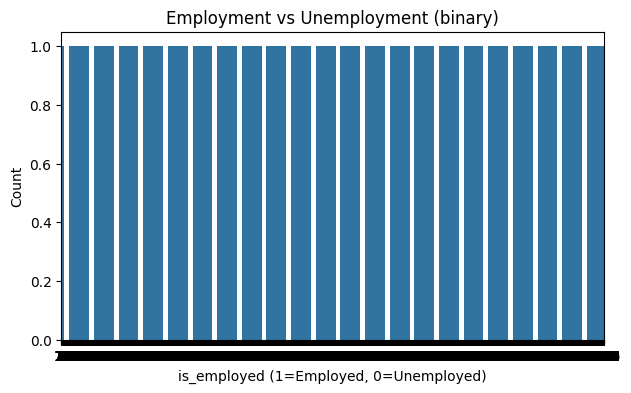

C:\Users\15145\AppData\Local\Temp\ipykernel_25940\3721241980.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ages, hist=True, kde=True, label=f"Employed={status}", color=color)
C:\Users\15145\AppData\Local\Temp\ipykernel_25940\3721241980.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

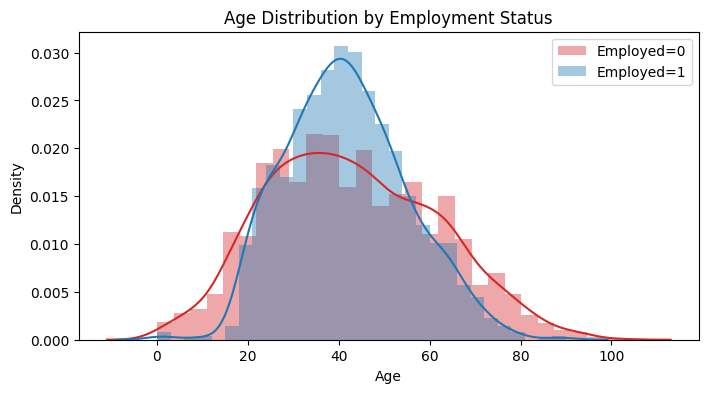

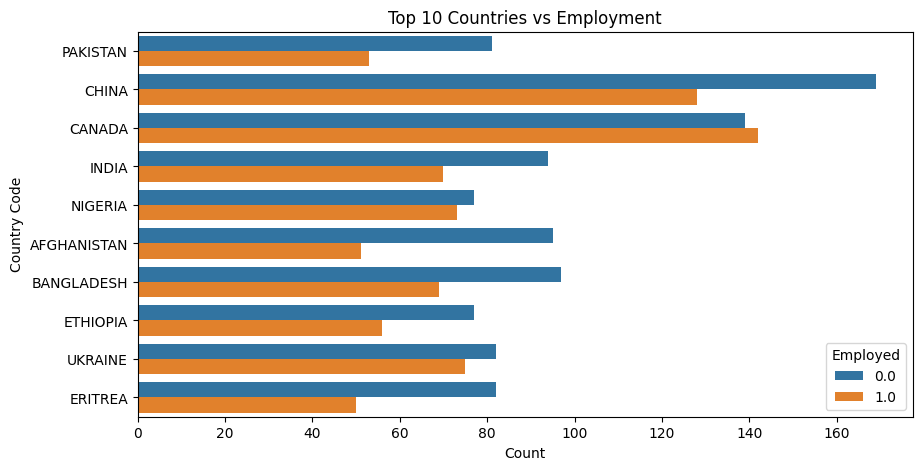

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_eda = subset.copy()

# Build binary target from employment_status
employed = [
    "Full-Time (20 hrs or more/wk)",
    "Part-Time (Less than 20 hrs/wk)",
    "Self Employed",
    "Casual Work (Less than 90 days/yr)",
]
unemployed = ["Unemployed", "Not in Labor Market"]

df_eda["is_employed"] = df_eda["employment_status"].apply(
    lambda x: 1 if x in employed else (0 if x in unemployed else np.nan)
)

print("Binary target distribution (1=employed, 0=unemployed):")
print(df_eda["is_employed"].value_counts(dropna=False))

# Countplot (works on old seaborn)
plt.figure(figsize=(7,4))
sns.countplot(df_eda["is_employed"])
plt.title("Employment vs Unemployment (binary)")
plt.xlabel("is_employed (1=Employed, 0=Unemployed)")
plt.ylabel("Count")
plt.show()

# Age distribution by class (use distplot for old seaborn)
plt.figure(figsize=(8,4))
for status, color in zip([0,1], ["tab:red", "tab:blue"]):
    ages = df_eda[df_eda["is_employed"] == status]["age"].dropna()
    if len(ages):
        sns.distplot(ages, hist=True, kde=True, label=f"Employed={status}", color=color)
plt.title("Age Distribution by Employment Status")
plt.xlabel("Age")
plt.legend()
plt.show()

# Top countries stacked by class
if "country_code" in df_eda:
    plt.figure(figsize=(10,5))
    top_countries = df_eda["country_code"].value_counts().head(10).index
    subset_top = df_eda[df_eda["country_code"].isin(top_countries)]
    sns.countplot(y="country_code", hue="is_employed", data=subset_top)
    plt.title("Top 10 Countries vs Employment")
    plt.xlabel("Count")
    plt.ylabel("Country Code")
    plt.legend(title="Employed")
    plt.show()


In [ ]:
# --- imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, roc_auc_score, average_precision_score,
    precision_recall_curve
)
# Optional (probability calibration)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df_ml = subset.copy()

# Binary target
employed = [
    "Full-Time (20 hrs or more/wk)",
    "Part-Time (Less than 20 hrs/wk)",
    "Self Employed",
    "Casual Work (Less than 90 days/yr)",
]
unemployed = ["Unemployed", "Not in Labor Market"]

df_ml["is_employed"] = df_ml["employment_status"].apply(
    lambda x: 1 if x in employed else (0 if x in unemployed else np.nan)
)
df_ml = df_ml.dropna(subset=["is_employed"])

# Features & simple impute
features = ["age", "country_code", "program_name"]
target = "is_employed"
df_ml["age"] = df_ml["age"].fillna(df_ml["age"].median())

X_train, X_test, y_train, y_test = train_test_split(
    df_ml[features], df_ml[target], test_size=0.25, random_state=42, stratify=df_ml[target]
)

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["country_code", "program_name"]),
        ("num", "passthrough", ["age"]),
    ]
)

model = Pipeline(steps=[
    ("pre", pre),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, roc_auc_score, average_precision_score
)

# Reuse df_ml with target created in previous cell
df_ml2 = df_ml.copy()
X = df_ml2[features]
y = df_ml2[target].astype(int)

# Train/Val/Test split by time not required here; we do a random split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["country_code", "program_name"]),
        ("num", "passthrough", ["age"]),
    ]
)

def evaluate_model(y_true, scores, threshold=0.5, label=""):
    y_pred = (scores >= threshold).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", pos_label=1)
    cm = confusion_matrix(y_true, y_pred)
    try:
        roc = roc_auc_score(y_true, scores)
        pr_auc = average_precision_score(y_true, scores)
    except Exception:
        roc, pr_auc = np.nan, np.nan
    print(f"\n=== {label} (thr={threshold:.3f}) ===")
    print(f"Accuracy: {acc:.3f} | Precision (1): {prec:.3f} | Recall (1): {rec:.3f} | F1 (1): {f1:.3f}")
    print(f"ROC-AUC: {roc:.3f} | PR-AUC (pos=1): {pr_auc:.3f}")
    print("Confusion Matrix:\n", cm)
    return acc, prec, rec, f1, roc, pr_auc

def best_threshold_by_f1(y_true, scores):
    qs = np.unique(np.quantile(scores, np.linspace(0.01, 0.99, 50)))
    best_f1, best_thr = -1.0, 0.5
    for thr in qs:
        y_pred = (scores >= thr).astype(int)
        _, _, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", pos_label=1)
        if f1 > best_f1:
            best_f1, best_thr = f1, float(thr)
    return best_thr, best_f1

# Logistic Regression (balanced)
from sklearn.pipeline import Pipeline
log_reg = Pipeline(steps=[
    ("pre", pre),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])
log_reg.fit(X_train, y_train)
val_scores_lr = log_reg.predict_proba(X_val)[:, 1]
test_scores_lr = log_reg.predict_proba(X_test)[:, 1]

evaluate_model(y_test, test_scores_lr, threshold=0.5, label="LogReg balanced - default")
thr_lr, f1_lr = best_threshold_by_f1(y_val, val_scores_lr)
evaluate_model(y_test, test_scores_lr, threshold=thr_lr, label="LogReg balanced - tuned")

# Random Forest (balanced)
rf = Pipeline(steps=[
    ("pre", pre),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ))
])
rf.fit(X_train, y_train)
val_scores_rf = rf.predict_proba(X_val)[:, 1]
test_scores_rf = rf.predict_proba(X_test)[:, 1]

evaluate_model(y_test, test_scores_rf, threshold=0.5, label="RandomForest - default")
thr_rf, f1_rf = best_threshold_by_f1(y_val, val_scores_rf)
evaluate_model(y_test, test_scores_rf, threshold=thr_rf, label="RandomForest - tuned")

print("\nChosen thresholds:")
print(f"  Logistic Regression tuned threshold: {thr_lr:.3f} (val F1={f1_lr:.3f})")
print(f"  Random Forest tuned threshold:       {thr_rf:.3f}")


In [ ]:
# Build a monthly series from intake_date (or another date you trust)
df_ts = subset.copy()

if "intake_date" not in df_ts.columns:
    raise ValueError("No 'intake_date' column available; time series needs a date.")

# Binary target (same definition)
employed = [
    "Full-Time (20 hrs or more/wk)",
    "Part-Time (Less than 20 hrs/wk)",
    "Self Employed",
    "Casual Work (Less than 90 days/yr)",
]
unemployed = ["Unemployed", "Not in Labor Market"]
df_ts["is_employed"] = df_ts["employment_status"].apply(
    lambda x: 1 if x in employed else (0 if x in unemployed else np.nan)
)

# Monthly aggregation: employment rate & unique clients
monthly = (
    df_ts.set_index("intake_date")
         .resample("M")
         .agg(employed_rate=("is_employed", "mean"),
              clients=("client_id", lambda s: s.nunique() if "client_id" in df_ts.columns else s.count()))
         .reset_index()
)

print(monthly.head())

# Quick plot with matplotlib
import matplotlib.pyplot as plt
monthly.set_index("intake_date")["employed_rate"].plot(figsize=(8,4), title="Monthly Employment Rate")
plt.ylabel("Employment Rate")
plt.show()

# Prophet (optional; requires prophet installed)
# from prophet import Prophet
# prophet_df = monthly.rename(columns={"intake_date": "ds", "employed_rate": "y"}).dropna()
# m = Prophet(seasonality_mode="multiplicative")
# m.fit(prophet_df)
# future = m.make_future_dataframe(periods=6, freq="M")
# forecast = m.predict(future)
# m.plot(forecast); plt.show()
